In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Unir todos los datos en un solo archivo csv

In [2]:
#Merge all the data set 
all_set = pd.DataFrame()
files = [file for file in os.listdir("Sales_Data")]
for i in files:
    df_temp = pd.read_csv("Sales_Data/"+i)
    all_set = pd.concat([all_set,df_temp])
all_set.head()
all_set.to_csv("all_data.csv",index=False)

## Acomodar los nombres a un formato mejor, Crear una culumna de los meses y borrar los numeros nulos o NaN

In [3]:
#fix the names 
all_data  = pd.read_csv('all_data.csv')
all_data.columns = all_data.columns.str.replace(" ", "_")
all_data.columns
#Create a month colummn
all_data["Month"] = all_data["Order_Date"].str[0:2]
#Drop NaN values
all_data.dropna(how="all",inplace=True)
is_nan = all_data[all_data.isna().any(axis=1)]
is_nan


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month


### Revisar por algunos errores, añadir una columna de las ventas y cambiar el formato de las cantidades a tipo numerico 

In [4]:
#check for error in months only numbers 
check_error = all_data[all_data["Month"].str[0:2]=="Or"]
check_error
#fix 
all_data= all_data[all_data["Month"].str[0:2]!="Or"]
#Change datatype
all_data["Month"].astype("int64")
all_data["Quantity_Ordered"] =pd.to_numeric(all_data["Quantity_Ordered"])
all_data["Price_Each"] = pd.to_numeric(all_data["Price_Each"])
#Add a new column Sales
all_data["Sales"] = all_data["Quantity_Ordered"] * all_data["Price_Each"]
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### La exploracion de los datos 


#### Cual fue el mejor mes del año donde hubo las mejores ventas, Cuanto se gano 

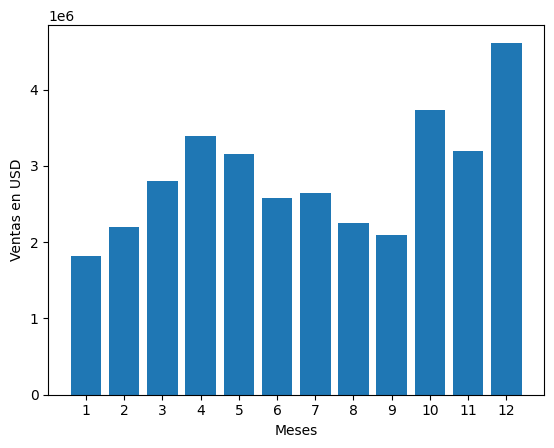

In [5]:
#What was the best month for sales? How much was earned that month?
best_month =all_data.groupby("Month").sum(numeric_only=True)
months= range(1,13)
plt.xlabel("Meses")
plt.ylabel("Ventas en USD")
plt.xticks(months)
plt.bar(months,best_month["Sales"])
plt.show()

In [31]:
best_month[["Sales"]]


,Sales
Month,
01,1822256.73
02,2202022.42
03,2807100.38
04,3390670.24
05,3152606.75
06,2577802.26
07,2647775.76
08,2244467.88
09,2097560.13


### Que ciudad tuvo las mayores ventas

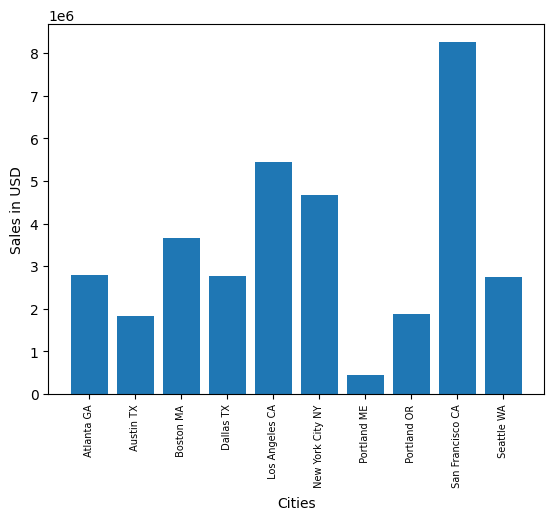

[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


In [32]:
# What had the city most sales 
#create a city column 
all_data["City"] = all_data["Purchase_Address"].apply(lambda x :x.split(",")[1]+" "+x.split(",")[2].split(" ")[1])
most_city_sales = all_data.groupby("City").sum(numeric_only=True)
cities = [city for city, i in all_data.groupby("City")]
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.bar(cities,most_city_sales["Sales"])
plt.xticks(cities,rotation="vertical",size=7)
plt.show()
print(cities)

### Hora donde deberiamos publicar los anuncios para maximizar la retencion de clientes 

([<matplotlib.axis.XTick at 0x1ec4eea1250>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24')])

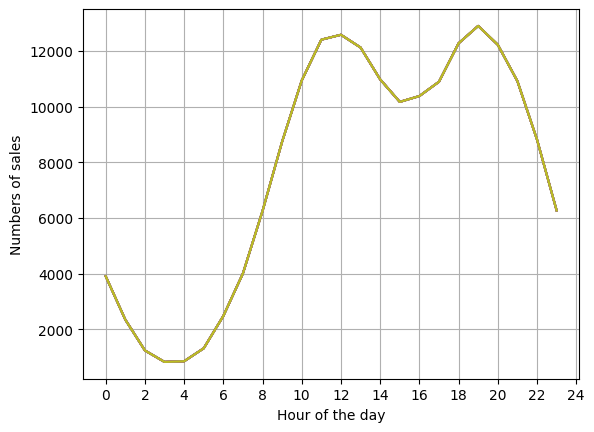

In [33]:
# What time should we display the advertise to maximaxe likelihood of customers buying products
all_data["Order_Date"] = pd.to_datetime(all_data["Order_Date"])
all_data["Hour"] = all_data["Order_Date"].dt.hour
time= [hour for hour, i in all_data.groupby("Hour")]
plt.plot(time,all_data.groupby(["Hour"]).count())
plt.xlabel("Hour of the day")
plt.ylabel("Numbers of sales")
ranges = range(0,25,2)
plt.grid()
plt.xticks(ranges)

### Que producto se vendio mas 

<AxesSubplot: xlabel='Product'>

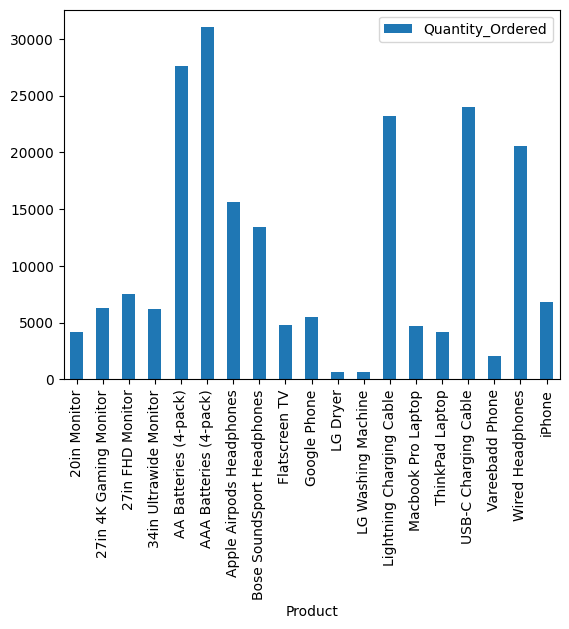

In [34]:
#What product sold the most 
all_data.groupby("Product").sum(numeric_only=True)[["Quantity_Ordered"]].plot(kind="bar")



### Que productos se venden unidos 

In [35]:
#What products are most often sold together?
sold_together = all_data[all_data["Order_ID"].duplicated(keep=False)]
sold_together["Grouped"] = sold_together.groupby("Order_ID")["Product"].transform(lambda x :",".join(x))
sold_together = sold_together[["Order_ID","Grouped"]].drop_duplicates()
from itertools import combinations
from collections import Counter 
count = Counter()
for i in sold_together["Grouped"]:
    row_list = i.split(",")
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)





C:\Users\raini\AppData\Local\Temp\ipykernel_12480\3431667306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_together["Grouped"] = sold_together.groupby("Order_ID")["Product"].transform(lambda x :",".join(x))


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]